# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

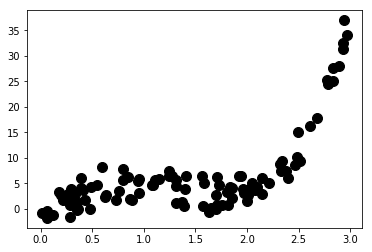

In [2]:
np.random.seed(0)
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,2).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([  2.03752081e+00,   2.41873058e+00,   4.77113325e+00,
         1.65122037e+00,   5.06987020e+00,   9.49494596e+00,
         5.76740037e+00,   4.84330161e+00,   8.21785491e-01,
         1.23469853e+00,   3.07851187e+00,   2.30733336e+00,
         3.21367117e-02,   2.24027258e+01,   1.99472980e+01,
         2.08540739e-01,   1.13426845e+00,   2.64419718e+00,
         3.65901867e+00,   2.53363840e+01,   4.34864749e+00,
         6.79933935e+00,   2.98088540e+00,   1.25904508e+00,
         7.40151963e+00,  -1.45451909e-02,   7.64762438e-01,
         6.37150870e+00,   4.22028106e+00,   9.14653122e-02,
         1.69928713e+00,  -1.72567377e-02,  -1.77639932e-02,
         1.63331701e+01,   7.79005579e-01,   2.38500407e+01,
         1.27414714e+01,   6.66728173e+00,   2.15619138e+00,
         1.06437843e+01])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.643655521453627
Explained variance score: 0.643655521453627
Median absolute error: 2.971012251464838
Mean squared error: 16.55324346390943
Mean absolute errors: 3.5218129946646655


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [9]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression())))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())))
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test))))

LR
Explained variance score: 0.39143852481644703
Median absolute error: 4.612200583943543
Mean squared error: 28.096512777430853
Mean absolute errors: 4.472470014802465
R^2: 0.3905002651140672
PR2
Explained variance score: 0.643655521453627
Median absolute error: 2.971012251464838
Mean squared error: 16.55324346390943
Mean absolute errors: 3.5218129946646655
R^2: 0.6409092622035476
PR3
Explained variance score: 0.897970185736609
Median absolute error: 1.9906716206633894
Mean squared error: 4.876196079120254
Mean absolute errors: 1.8353473677266738
R^2: 0.8942203169119629
PR4
Explained variance score: 0.9190463666133722
Median absolute error: 1.4442102914656663
Mean squared error: 3.862465206027319
Mean absolute errors: 1.6511545528804938
R^2: 0.9162112559046534
PR5
Explained variance score: 0.9186173019878832
Median absolute error: 1.4801144120775196
Mean squared error: 3.8773350249594416
Mean absolute errors: 1.6588050070221285
R^2: 0.9158886838200418
PR6
Explained variance score: 0.9